In [5]:
from scipy.sparse import diags
import random
import numpy as np
import scipy as sc
import pandas as pd
import csv
import scipy.linalg as spl
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
import time
import sys
sys.path.insert(0, '../../python/')
from opt_utils import *
from grad_utils import *
from ks_utils import *
from simulation_utils import *
from cv_utils import *
%matplotlib inline

# Generate synethic data

In [2]:
N = 30 # number of teams
T = 30 # number of seasons/rounds/years
tn = [1] * int(T * N * (N - 1)/2) # number of games between each pair of teams

### Gaussian Process

In [3]:
random.seed(0)
np.random.seed(0)
P_list = make_prob_matrix(T,N,r = 1,alpha = 1,mu = [0,0.2])
game_matrix_list = get_game_matrix_list_from_P(tn,P_list)

In [4]:
data = game_matrix_list # shape: T*N*N

## Oracle estimator

In [5]:
# vanilla BT
random.seed(0)
np.random.seed(0)
_, beta_oracle = gd_bt(data = P_list)

Text(0,0.5,'latent parameter')

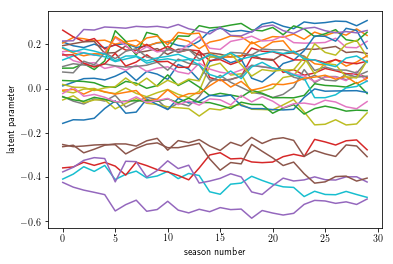

In [6]:
latent = beta_oracle
for i in range(N):
    plt.plot(latent[:,i], label="team %d"%i)
plt.xlabel("season number")
plt.ylabel("latent parameter")
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1.03, 1, 0))

## Kernel method

## $h = T^{-3/4}$

In [7]:
T**(-3/4)

0.07801157731069053

In [8]:
T, N = data.shape[0:2]
ks_data = kernel_smooth(data,1/6 * T**(-1/5))

In [10]:
objective_pgd, beta_pgd = gd_bt(data = ks_data,verbose=True)

initial objective value: 9045.570706
1-th GD, objective value: 8845.006919
2-th GD, objective value: 8843.367612
3-th GD, objective value: 8843.329055
4-th GD, objective value: 8843.327821
5-th GD, objective value: 8843.327774
6-th GD, objective value: 8843.327772
7-th GD, objective value: 8843.327772
8-th GD, objective value: 8843.327772
9-th GD, objective value: 8843.327772
10-th GD, objective value: 8843.327772
11-th GD, objective value: 8843.327772
12-th GD, objective value: 8843.327772
Converged!


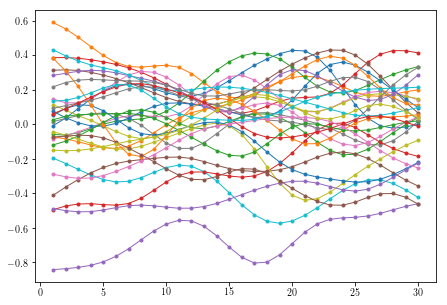

In [11]:
T, N = data.shape[0:2]
beta = beta_pgd.reshape((T,N))
f = plt.figure(1, figsize = (9,5))
ax = plt.subplot(111)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],marker = '.',label = 'Team' + str(i),linewidth=1)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
# f.savefig("l2_sq_solution.pdf", bbox_inches='tight')

## LOOCV

In [12]:
start_time = time.time()

random.seed(0)
np.random.seed(0)
h_list = np.linspace(0.3, 0.01, 10)
# h_cv, nll_cv, beta_cv, prob_cv = cv_utils.loocv_ks(data, h_list, gd_bt, num_loocv = 200, return_prob = True, out = "notebook")
h_cv, nll_cv, beta_cv, prob_cv = loocv_ks(data, h_list, gd_bt, num_loocv = 200, return_prob = True, out = "notebook")
loo_nll_DBT, loo_prob_DBT = max(nll_cv), prob_cv[np.argmax(nll_cv)]

print("--- %s seconds ---" % (time.time() - start_time))

1-th cv done
2-th cv done
3-th cv done
4-th cv done
5-th cv done
6-th cv done
7-th cv done
8-th cv done
9-th cv done
10-th cv done
11-th cv done
12-th cv done
13-th cv done
14-th cv done
15-th cv done
16-th cv done
17-th cv done
18-th cv done
19-th cv done
20-th cv done
21-th cv done
22-th cv done
23-th cv done
24-th cv done
25-th cv done
26-th cv done
27-th cv done
28-th cv done
29-th cv done
30-th cv done
31-th cv done
32-th cv done
33-th cv done
34-th cv done
35-th cv done
36-th cv done
37-th cv done
38-th cv done
39-th cv done
40-th cv done
41-th cv done
42-th cv done
43-th cv done
44-th cv done
45-th cv done
46-th cv done
47-th cv done
48-th cv done
49-th cv done
50-th cv done
51-th cv done
52-th cv done
53-th cv done
54-th cv done
55-th cv done
56-th cv done
57-th cv done
58-th cv done
59-th cv done
60-th cv done
61-th cv done
62-th cv done
63-th cv done
64-th cv done
65-th cv done
66-th cv done
67-th cv done
68-th cv done
69-th cv done
70-th cv done
71-th cv done
72-th cv done
7

In [13]:
h_cv

0.2677777777777778

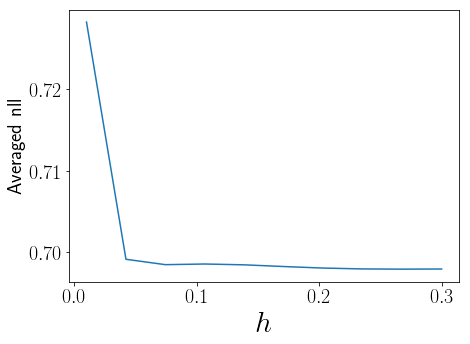

In [14]:
f = plt.figure(1, figsize = (7,5))
size_ylabel = 20
size_xlabel = 30
size_tick = 20

nll_cv = nll_cv
plt.plot(h_list[::-1], nll_cv)
plt.xlabel(r'$h$',fontsize = size_xlabel); plt.ylabel(r"Averaged nll",fontsize = size_ylabel)
plt.tick_params(axis='both', which='major', labelsize=size_tick)

# f.savefig("cv_curve.pdf", bbox_inches='tight')

In [15]:
import time
start_time = time.time()

random.seed(0)
np.random.seed(0)
h = h_cv
nll_DBT, beta_DBT, prob_DBT = loo_DBT(data, h, gd_bt, num_loo = 200, return_prob = True, out = "notebook")

print("--- %s seconds ---" % (time.time() - start_time))

1-th cv done
2-th cv done
3-th cv done
4-th cv done
5-th cv done
6-th cv done
7-th cv done
8-th cv done
9-th cv done
10-th cv done
11-th cv done
12-th cv done
13-th cv done
14-th cv done
15-th cv done
16-th cv done
17-th cv done
18-th cv done
19-th cv done
20-th cv done
21-th cv done
22-th cv done
23-th cv done
24-th cv done
25-th cv done
26-th cv done
27-th cv done
28-th cv done
29-th cv done
30-th cv done
31-th cv done
32-th cv done
33-th cv done
34-th cv done
35-th cv done
36-th cv done
37-th cv done
38-th cv done
39-th cv done
40-th cv done
41-th cv done
42-th cv done
43-th cv done
44-th cv done
45-th cv done
46-th cv done
47-th cv done
48-th cv done
49-th cv done
50-th cv done
51-th cv done
52-th cv done
53-th cv done
54-th cv done
55-th cv done
56-th cv done
57-th cv done
58-th cv done
59-th cv done
60-th cv done
61-th cv done
62-th cv done
63-th cv done
64-th cv done
65-th cv done
66-th cv done
67-th cv done
68-th cv done
69-th cv done
70-th cv done
71-th cv done
72-th cv done
7

In [16]:
def get_winrate(data):
    T, N = data.shape[:2]
    winrate = np.sum(data, 2) / (np.sum(data,2) + np.sum(data,1))
    return winrate

def loo_winrate(data,num_loo = 200):
    indices = np.array(np.where(np.full(data.shape, True))).T
    cum_match = np.cumsum(data.flatten())
    
    loglikes_loo = 0
    prob_loo = 0
    for i in range(num_loo):
        data_loo = data.copy()
        rand_match = np.random.randint(np.sum(data))
        rand_index = indices[np.min(np.where(cum_match >= rand_match)[0])]
        data_loo[tuple(rand_index)] -= 1
        
        winrate_loo = get_winrate(data = data_loo)
        prob_loo += 1 - winrate_loo[rand_index[0],rand_index[1]]

    return (-loglikes_loo/num_loo, prob_loo/num_loo)
# winrate
random.seed(0)
np.random.seed(0)
winrate = get_winrate(data)
loo_nll_wr, loo_prob_wr = loo_winrate(data)

In [17]:
loo_prob_wr

0.49517857142857125

In [18]:
# vanilla BT
import time
start_time = time.time()

random.seed(0)
np.random.seed(0)
objective_vanilla_bt, beta_vanilla_bt = gd_bt(data = data,verbose = True)
loo_nll_vBT, loo_prob_vBT = loo_vBT(data,num_loo = 200)

print("--- %s seconds ---" % (time.time() - start_time))

initial objective value: 9045.570706
1-th GD, objective value: 8495.674227
2-th GD, objective value: 8485.937835
3-th GD, objective value: 8485.145866
4-th GD, objective value: 8485.045520
5-th GD, objective value: 8485.027968
6-th GD, objective value: 8485.022722
7-th GD, objective value: 8485.022608
8-th GD, objective value: 8485.022585
9-th GD, objective value: 8485.022577
10-th GD, objective value: 8485.022577
11-th GD, objective value: 8485.022577
12-th GD, objective value: 8485.022577
13-th GD, objective value: 8485.022577
14-th GD, objective value: 8485.022577
15-th GD, objective value: 8485.022577
16-th GD, objective value: 8485.022577
Converged!
--- 2.961585760116577 seconds ---


In [19]:
loo_nll_vBT

0.7289100679198293

In [20]:
loo_prob_vBT

0.49324063307948934

In [21]:
rank_dif_estimator = [0] * 3
beta_all = [winrate,beta_vanilla_bt,beta_cv]
for i in range(len(rank_dif_estimator)):
    betai = beta_all[i]
    rank_dif_estimator[i] = np.mean(av_dif_rank(beta_oracle,betai))
rank_dif_estimator

df = pd.DataFrame({'estimator':['winrate','vanilla BT','DBT'],'average rank difference':rank_dif_estimator,
                  'LOO Prob':[loo_prob_wr,loo_prob_vBT,loo_prob_DBT],
                   'LOO nll':[loo_nll_wr,loo_nll_vBT,loo_nll_DBT]})

In [22]:
print(df.to_latex(index_names=True, escape=False, index=False, 
                          column_format='c|c|c|c|', float_format="{:0.2f}".format,
                          header=True, bold_rows=True))

\begin{tabular}{c|c|c|c|}
\toprule
 LOO Prob &  LOO nll &  average rank difference &   estimator \\
\midrule
     0.50 &     0.00 &                     7.17 &     winrate \\
     0.49 &     0.73 &                     7.04 &  vanilla BT \\
     0.49 &     0.73 &                     2.84 &         DBT \\
\bottomrule
\end{tabular}



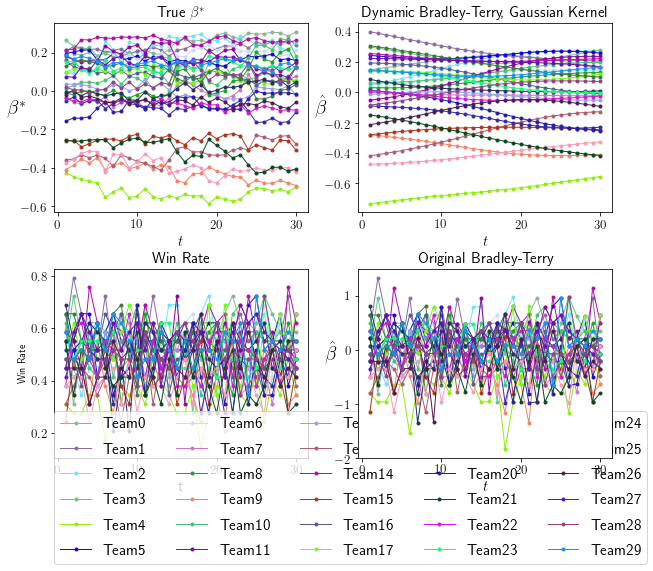

In [23]:
T, N = data.shape[0:2]
f = plt.figure(1, figsize = (10,8))

size_ylabel = 20
size_xlabel = 15
size_title = 15
size_tick = 13
size_legend = 15.4
font_title = "Times New Roman Bold"

random.seed(0)
np.random.seed(0)
color_matrix = c=np.random.rand(N,3)

beta = beta_oracle.reshape((T,N))
ax = plt.subplot(221)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"True $\beta^*$",fontsize = size_title)
    plt.xlabel(r"$t$",fontsize = size_xlabel); plt.ylabel(r"${\beta}^*$",fontsize = size_ylabel,rotation = "horizontal")
    bottom, top = plt.ylim()
    
beta = beta_cv.reshape((T,N))
ax = plt.subplot(222)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Dynamic Bradley-Terry, Gaussian Kernel",fontsize = size_title)
    plt.xlabel(r"$t$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
#     plt.ylim((bottom, top))


beta = winrate.reshape((T,N))
ax = plt.subplot(223)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Win Rate",fontsize = size_title)
    plt.xlabel("t",fontsize = size_xlabel); plt.ylabel(r"Win Rate",fontsize = 10,rotation = "vertical")


ax.legend(loc='lower left', fontsize = size_legend,labelspacing = 0.75,bbox_to_anchor=(-0.03,-0.6),ncol = 5)


beta = beta_vanilla_bt.reshape((T,N))
ax = plt.subplot(224)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Original Bradley-Terry",fontsize = size_title)
    plt.xlabel(r"$t$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
    

plt.subplots_adjust(hspace = 0.3)
plt.show()
# f.savefig("compare.pdf", bbox_inches='tight')

## repeated experiment

In [24]:
import time
start_time = time.time()

random.seed(0)
np.random.seed(0)
B = 20
loo_ks = 200
loo = 200
h_cv_list = []
rank_diff_DBT_list, loo_nll_DBT_list, loo_prob_DBT_list = [], [], []
rank_diff_wr_list, loo_nll_wr_list, loo_prob_wr_list = [], [], []
rank_diff_vBT_list, loo_nll_vBT_list, loo_prob_vBT_list = [], [], []

for b in range(B):
    N = 30 # number of teams
    T = 30 # number of seasons/rounds/years
    tn = [1] * int(T * N * (N - 1)/2) # number of games between each pair of teams

    [alpha,r] = [1,1]
    ##### get beta here #####
    P_list = make_prob_matrix(T,N,r = r,alpha = alpha,mu = [0,0.2])
    P_winrate = P_list.sum(axis=2)
    
    game_matrix_list = get_game_matrix_list_from_P(tn,P_list)
    data = game_matrix_list # shape: T*N*N

    # true beta
    _, beta_oracle = gd_bt(data = P_list)

#     # ks cv
#     h_list = np.linspace(0.3, 0.01, 10)
#     h_cv, nll_cv, beta_cv, prob_cv = loocv_ks(data, h_list, gd_bt, num_loocv = loo_ks, verbose = False,
#                                               return_prob = True, out = "notebook")
#     h_cv_list.append(h_cv)
#     loo_nll_DBT_list.append(max(nll_cv)) 
#     loo_prob_DBT_list.append(prob_cv[np.argmax(nll_cv)])
#     rank_diff_DBT_list.append(np.mean(av_dif_rank(beta_oracle,beta_cv)))
    
    # fixed h
    h_cv = 1/6 * T**(-1/5)
    nll_cv, beta_cv, prob_cv = loo_DBT(data, h_cv, gd_bt, num_loo = 200, return_prob = True, out = "notebook")
    h_cv_list.append(h_cv)
    loo_nll_DBT_list.append(nll_cv) 
    loo_prob_DBT_list.append(prob_cv)
    rank_diff_DBT_list.append(np.mean(av_dif_rank(beta_oracle,beta_cv)))
    
    winrate = get_winrate(data)
    loo_nll_wr, loo_prob_wr = loo_winrate(data,num_loo = loo)
    loo_nll_wr_list.append(loo_nll_wr)
    loo_prob_wr_list.append(loo_prob_wr)
    rank_diff_wr_list.append(np.mean(av_dif_rank(beta_oracle,winrate)))
    
    objective_vanilla_bt, beta_vBT = gd_bt(data = data)
    loo_nll_vBT, loo_prob_vBT = loo_vBT(data,num_loo = loo)
    loo_nll_vBT_list.append(loo_nll_vBT)
    loo_prob_vBT_list.append(loo_prob_vBT)
    rank_diff_vBT_list.append(np.mean(av_dif_rank(beta_oracle,beta_vBT)))
    
    print(str(b) + '-th repeat finished.')
    print("--- %s seconds ---" % (time.time() - start_time))
    
    
rank_dif_estimator = [np.mean(rank_diff_wr_list),
                     np.mean(rank_diff_vBT_list),
                     np.mean(rank_diff_DBT_list)]
loo_prob_wr = np.mean(loo_prob_wr_list)
loo_prob_DBT = np.mean(loo_prob_DBT_list)
loo_prob_vBT = np.mean(loo_prob_vBT_list)

loo_nll_wr = np.mean(loo_nll_wr_list)
loo_nll_DBT = np.mean(loo_nll_DBT_list)
loo_nll_vBT = np.mean(loo_nll_vBT_list)

df = pd.DataFrame({'estimator':['winrate','vanilla BT','DBT'],'average rank difference':rank_dif_estimator,
                  'LOO Prob':[loo_prob_wr,loo_prob_vBT,loo_prob_DBT],
                   'LOO nll':[loo_nll_wr,loo_nll_vBT,loo_nll_DBT]})

print("--- %s seconds ---" % (time.time() - start_time))

1-th cv done
2-th cv done
3-th cv done
4-th cv done
5-th cv done
6-th cv done
7-th cv done
8-th cv done
9-th cv done
10-th cv done
11-th cv done
12-th cv done
13-th cv done
14-th cv done
15-th cv done
16-th cv done
17-th cv done
18-th cv done
19-th cv done
20-th cv done
21-th cv done
22-th cv done
23-th cv done
24-th cv done
25-th cv done
26-th cv done
27-th cv done
28-th cv done
29-th cv done
30-th cv done
31-th cv done
32-th cv done
33-th cv done
34-th cv done
35-th cv done
36-th cv done
37-th cv done
38-th cv done
39-th cv done
40-th cv done
41-th cv done
42-th cv done
43-th cv done
44-th cv done
45-th cv done
46-th cv done
47-th cv done
48-th cv done
49-th cv done
50-th cv done
51-th cv done
52-th cv done
53-th cv done
54-th cv done
55-th cv done
56-th cv done
57-th cv done
58-th cv done
59-th cv done
60-th cv done
61-th cv done
62-th cv done
63-th cv done
64-th cv done
65-th cv done
66-th cv done
67-th cv done
68-th cv done
69-th cv done
70-th cv done
71-th cv done
72-th cv done
7

In [25]:
print(df.to_latex(index_names=True, escape=False, index=False, 
                          column_format='c|c|c|c|', float_format="{:0.2f}".format,
                          header=True, bold_rows=True))

\begin{tabular}{c|c|c|c|}
\toprule
 LOO Prob &  LOO nll &  average rank difference &   estimator \\
\midrule
     0.50 &     0.00 &                     6.88 &     winrate \\
     0.49 &     0.71 &                     6.85 &  vanilla BT \\
     0.49 &     0.69 &                     4.08 &         DBT \\
\bottomrule
\end{tabular}



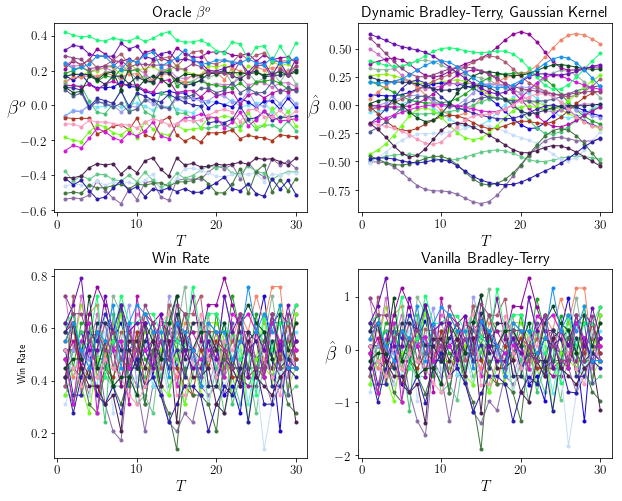

In [26]:
T, N = data.shape[0:2]
f = plt.figure(1, figsize = (10,8))

size_ylabel = 20
size_xlabel = 15
size_title = 15
size_tick = 13
size_legend = 15.4
font_title = "Times New Roman Bold"

random.seed(0)
np.random.seed(0)
color_matrix = c=np.random.rand(N,3)

beta = beta_oracle.reshape((T,N))
ax = plt.subplot(221)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Oracle $\beta^o$",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"${\beta}^o$",fontsize = size_ylabel,rotation = "horizontal")
#     bottom, top = plt.ylim()
    
beta = beta_cv.reshape((T,N))
ax = plt.subplot(222)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Dynamic Bradley-Terry, Gaussian Kernel",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
#     plt.ylim((bottom, top))


beta = winrate.reshape((T,N))
ax = plt.subplot(223)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Win Rate",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"Win Rate",fontsize = 10,rotation = "vertical")


# ax.legend(loc='lower left', fontsize = size_legend,labelspacing = 0.75,bbox_to_anchor=(-0.03,-0.6),ncol = 5)


beta = beta_vBT.reshape((T,N))
ax = plt.subplot(224)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Vanilla Bradley-Terry",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
    

plt.subplots_adjust(hspace = 0.3)
plt.show()
f.savefig("compare_beta_NT30_n1_ag.pdf", bbox_inches='tight')

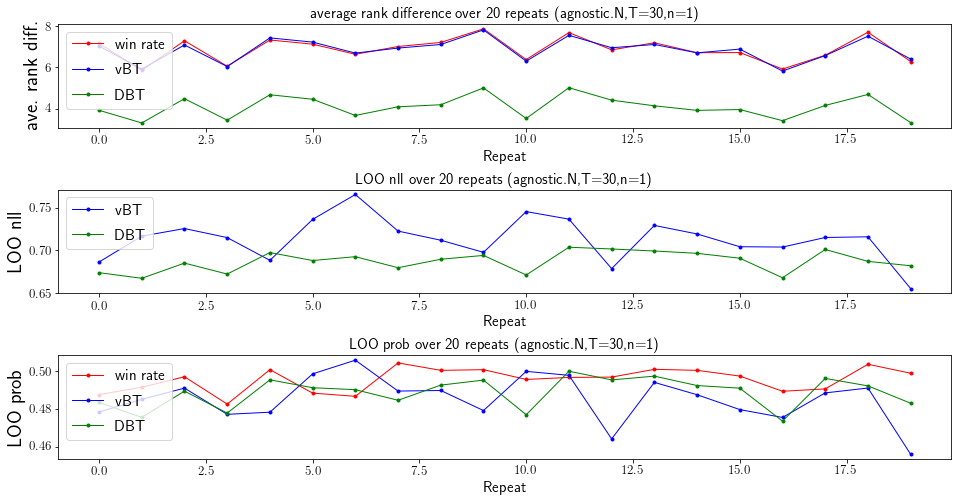

In [27]:
f = plt.figure(1, figsize = (16,8))

size_ylabel = 20
size_xlabel = 15
size_title = 15
size_tick = 13
size_legend = 15.4
font_title = "Times New Roman Bold"

random.seed(0)
np.random.seed(0)
color_list = ['red','blue','green']
x_range = [i for i in range(B)]

ax = plt.subplot(311)
ax.plot(x_range,rank_diff_wr_list,c=color_list[0],marker = '.',label = 'win rate',linewidth=1)
ax.plot(x_range,rank_diff_vBT_list,c=color_list[1],marker = '.',label = 'vBT',linewidth=1)
ax.plot(x_range,rank_diff_DBT_list,c=color_list[2],marker = '.',label = 'DBT',linewidth=1)

ax.tick_params(axis='both', which='major', labelsize=size_tick)
plt.title(r"average rank difference over 20 repeats (agnostic.N,T=30,n=1)",fontsize = size_title)
plt.xlabel(r"Repeat",fontsize = size_xlabel); plt.ylabel(r"ave. rank diff.",fontsize = size_ylabel,rotation = "vertical")
ax.legend(loc='upper left', fontsize = size_legend,labelspacing = 0.75,ncol = 1)
    
ax = plt.subplot(312)
ax.plot(x_range,loo_nll_vBT_list,c=color_list[1],marker = '.',label = 'vBT',linewidth=1)
ax.plot(x_range,loo_nll_DBT_list,c=color_list[2],marker = '.',label = 'DBT',linewidth=1)

ax.tick_params(axis='both', which='major', labelsize=size_tick)
plt.title(r"LOO nll over 20 repeats (agnostic.N,T=30,n=1)",fontsize = size_title)
plt.xlabel(r"Repeat",fontsize = size_xlabel); plt.ylabel(r"LOO nll",fontsize = size_ylabel,rotation = "vertical")
ax.legend(loc='upper left', fontsize = size_legend,labelspacing = 0.75,ncol = 1)

ax = plt.subplot(313)
ax.plot(x_range,loo_prob_wr_list,c=color_list[0],marker = '.',label = 'win rate',linewidth=1)
ax.plot(x_range,loo_prob_vBT_list,c=color_list[1],marker = '.',label = 'vBT',linewidth=1)
ax.plot(x_range,loo_prob_DBT_list,c=color_list[2],marker = '.',label = 'DBT',linewidth=1)

ax.tick_params(axis='both', which='major', labelsize=size_tick)
plt.title(r"LOO prob over 20 repeats (agnostic.N,T=30,n=1)",fontsize = size_title)
plt.xlabel(r"Repeat",fontsize = size_xlabel); plt.ylabel(r"LOO prob",fontsize = size_ylabel,rotation = "vertical")
ax.legend(loc='upper left', fontsize = size_legend,labelspacing = 0.75,ncol = 1)


plt.subplots_adjust(hspace = 0.6)
plt.show()
f.savefig("perform_NT30_n1_ag.pdf", bbox_inches='tight')